In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tool.core import data_types
from tool.pyqt_gui.qt_utils import find_pkl

In [67]:
session_folder = '/home/nastya/Desktop/ood_datasets/DroneBird/oodsession_6'
ood_file_path = ood_file = find_pkl.get_ood_file(session_folder)
corresponding_meta_file = find_pkl.get_metadata_file(session_folder)

print(ood_file_path)
print(corresponding_meta_file)

ood_df = pd.read_pickle(ood_file_path)
meta_df = pd.read_pickle(corresponding_meta_file)

data_df = pd.merge(meta_df, ood_df[
                  [data_types.RelativePathType.name(), data_types.OoDScoreType.name()]],
                                    on=data_types.RelativePathType.name(), how='inner')

ood_score = data_df[data_types.OoDScoreType.name()].values

/home/nastya/Desktop/ood_datasets/DroneBird/oodsession_6/ood_score_230507_141831.144.ood.pkl
/home/nastya/Desktop/ood_datasets/DroneBird/oodsession_6/DroneBird.meta.pkl


In [38]:
data_df.head(5)

,relative_path,labels,test_sample,label,ood_score
0,drones/train/singleDronesinsky366.jpeg,"[Drone, Bird]",False,Drone,0.568938
1,drones/train/foto00291.png,"[Drone, Bird]",False,Drone,0.517331
2,drones/train/37452103-9786-4f63-a6ac-64bd46044...,"[Drone, Bird]",False,Drone,0.121804
3,drones/train/video14_88.JPEG,"[Drone, Bird]",False,Drone,0.308430
4,drones/train/singleDronesinsky55.jpeg,"[Drone, Bird]",False,Drone,0.632666


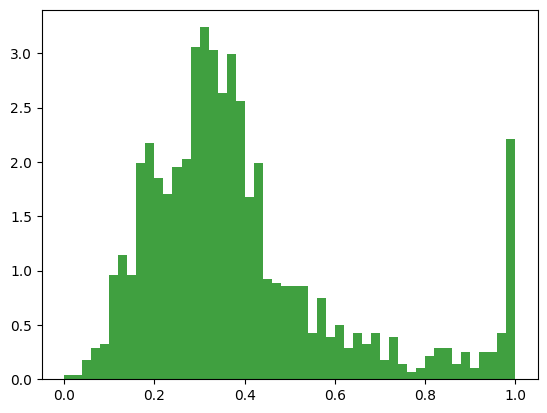

In [39]:
n, bins, patches = plt.hist(
    ood_score, 50, density=1, facecolor="green", alpha=0.75
)

In [8]:
def get_hist(data_df, label):
    df = data_df[data_df[data_types.LabelType.name()] == label]
    ood_score = df[data_types.OoDScoreType.name()].values
    n, bins, patches = plt.hist(ood_score, 50, density=1, facecolor="green", alpha=0.75)

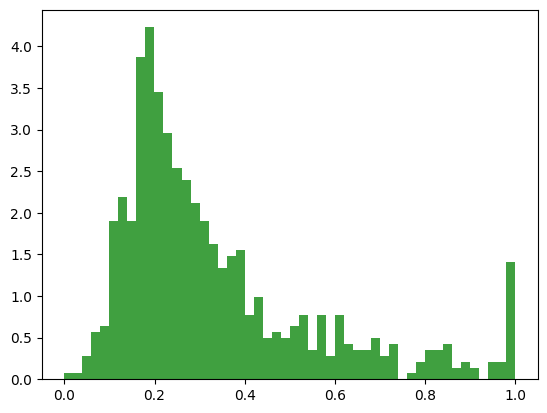

In [9]:
get_hist(data_df, 'Drone')

In [11]:
def get_samples_with_ood_above(input_df, threshold: int, label=''):
    local_df = input_df.copy()
    if label != '':
        local_df = local_df[data_df[data_types.LabelType.name()] == label]
    local_df.sort_values(by=[data_types.OoDScoreType.name()], inplace=True, ascending=False)
    local_df = local_df[local_df[data_types.OoDScoreType.name()] > threshold]
    return local_df

In [43]:
get_samples_with_ood_above(data_df, 0.95, 'Drone').head(5)

,relative_path,labels,test_sample,label,ood_score,ood_flag
683,drones/red_drones/pic_563.jpg,"[Drone, Bird]",True,Drone,0.999358,False
478,drones/test/df1df129-e166-405f-9bf8-247257391a...,"[Drone, Bird]",True,Drone,0.998593,False
493,drones/test/singleDronesinsky348.jpeg,"[Drone, Bird]",True,Drone,0.998488,False
480,drones/test/singleDronesinsky138.jpeg,"[Drone, Bird]",True,Drone,0.998093,False
662,drones/test/singleDronesinsky364.jpeg,"[Drone, Bird]",True,Drone,0.997381,False
